# Introduction
explore the NCVS data

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

from scipy import stats

# Analysis/Modeling

## NCVS

In [1]:
df_incident = pd.read_stata("1992-2016_Incident.dta", convert_categoricals=False)

In [82]:
pd.set_option('max_columns', None)
df_incident[(df_incident['V2076']==1) & (df_incident['V2079']==1)].head()
pd.reset_option("max_columns")

,YEARQ,YEARQ_ORIG,YEAR_ORIG,IDHH,IDPER,YEAR,V2001,V2002,V2003,V2004,V2005,V2006,V2007,V2008,V2009,V2010,V2011,V2012,V2013,V2014,V2015,V2016,V2017,V2018,V2019,V2020,V2021,V2022,V2023,V2024,V2025,V2025A,V2025B,V2026,SC214A,V2027,V2028,V2029,V2030,V2031,V2032,V2033,V2034,V2035,V2036,V2037,V2038,V2039,V2040,V2040A,V2041,V2042,V2043,V2044,V2045,V2046,V2047,V2048,V2049,V2049A,V2050,V2051,V2052,V2053,V2054,V2055,V2056,V2057,V2058,V2059,V2060,V2061,V2062,V2063,V2064,V2065,V2066,V2067,V2068,V2069,V2070,V2071,V2072,V2072A,V2073,V2074,V2075,V2076,V2077,V2078,V2079,V2080,V2080A,V2080B,V2080C,V2080D,V2080E,V2080F,V2080G,V2080H,V2080I,V2080J,V2080K,V2080L,V2080M,V2080N,V2080O,V2080P,V2080Q,V2080R,V2080S,V2080T,V2080U,V2080V,V2080W,V2080X,V2080Y,V2080Z,V2080AA,V2080AB,V2080AC,V2080AD,V2080AE,V2080AF,V2080AG,V2080AH,V2080AI,V2080B1,V2080B2,V2080B3,V2080B4,V2080B5,V2080B6,V2080B7,V2080AJ,V2081,V2082,V2083,V2084,V2085,V2086,V2087,V2088,V2089,V2090,V2091,V2092,V2093,V2094,V2095,V2096,V2097,V2098,V2099,V2100,V2101,V2102,V2103,V2104,V2105,V2105A,V2105B,V2105C,V2105D,V2105E,V2105F,V2105G,V2105H,V2105I,V2106,V2107,V2108,V2109,V2110,V2111,V2112,V2113,V2114,V2115,V2116,WGTHHCY,V2117,V2118,V2119,V2120,V2121,V2121B,V2122,V2123,V2124,V2125,V2126A,V2126B,V2127A,V2127B,V2128A,V2128B,V2129,V2130,V2131,V2132,V2133,V2134,V2135,V2136,V2137,V2138,V2139,V2140,V2141,V2142,FRCODE,COHORT,TIS,ADDR_TIS,HH_TIS,HHINTVNUM,TYPEINTV_TIS1,TYPEINTV_TIS2,TYPEINTV_TIS3,TYPEINTV_TIS4,TYPEINTV_TIS5,TYPEINTV_TIS6,TYPEINTV_TIS7,HHBOUNDED,V3001,V3002,V3003,V3004,V3005,V3006,V3007,V3008,V3009,V3010,V3011,V3012,V3013,V3014,V3015,V3016,V3017,V3018,V3019,V3020,V3021,V3022,V3023,V3023A,V3024,V3024A,V3025,V3026,V3027,V3028,V3029,V3030,V3031,V3032,V3033,V3034,V3035,V3036,V3037,V3038,V3039,V3040,V3041,V3042,V3043,V3044,V3045,V3046,V3047,V3048,V3049,V3050,V3051,V3052,V3053,V3054,V3055,V3056,V3057,V3058,V3059,V3059A,V3059B,V3059C,V3059D,V3059E,V3059F,V3059G,V3059H,V3059I,V3059J,V3059K,V3059L,V3059M,V3059N,V3059O,V3059P,V3059Q,V3059R,V3059S,V3059T,V3059U,V3059V,V3059W,V3059X,V3059Y,V3059Z,V3059AA,V3059AB,V3060,V3061,V3062,V3063,V3064,V3065,V3066,V3067,V3068,V3069,V3070,V3_V4526H3A,V3_V4526H3B,V3_V4526H5,V3_V4526H4,V3_V4526H6,V3_V4526H7,V3071,V3072,V3073,V3074,V3075,V3076,V3077,V3078,V3079,V3080,WGTPERCY,V3081,V3082,PER_TIS,PERINTVNUM,PINTTYPE_TIS1,PINTTYPE_TIS2,PINTTYPE_TIS3,PINTTYPE_TIS4,PINTTYPE_TIS5,PINTTYPE_TIS6,PINTTYPE_TIS7,PERBOUNDED,V4001,V4002,V4003,V4004,V4005,V4006,V4007,V4008,V4009,V4010,V4011,V4012,V4013,V4014,V4015,V4016,V4017,V4018,V4019,V4020,V4021,V4021B,V4022,V4023,V4023B,V4024,V4025,V4026,V4027,V4028,V4029,V4030,V4031,V4032,V4033,V4034,V4035,V4036,V4037,V4038,V4039,V4040,V4041A,V4041B,V4041C,V4042,V4043,V4044,V4045,V4046,V4047,V4048,V4049,V4050,V4051,V4052,V4053,V4054,V4055,V4056,V4057,V4058,V4059,V4060,V4061,V4062,V4063,V4064,V4065,V4066,V4067,V4068,V4069,V4070,V4071,V4072,V4073,V4074,V4075,V4076,V4077,V4078,V4079,V4080,V4081,V4082,V4083,V4084,V4085,V4086,V4087,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096,V4097,V4098,V4099,V4100,V4101,V4102,V4103,V4104,V4105,V4106,V4107,V4108,V4109,V4110,V4111,V4112,V4113,V4114,V4115,V4116,V4117,V4118,V4119,V4120,V4121,V4122,V4123,V4124,V4125,V4126,V4127,V4128,V4129,V4130,V4131,V4132,V4133,V4134,V4135,V4136,V4137,V4138,V4139,V4140,V4140B1,V4140B2,V4140B3,V4140B4,V4140B5,V4140B6,V4140B7,V4140B8,V4140B9,V4140B10,V4140B11,V4140B12,V4140B13,V4140B14,V4140B15,V4140B16,V4140B17,V4140B18,V4140B19,V4140B20,V4140B21,V4140B22,V4140B23,V4140B24,V4140B25,V4140B26,V4140B27,V4140B28,V4140B29,V4140B30,V4140B31,V4140B32,V4140B33,V4140B34,V4140B35,V4140A,V4141,V4142,V4143,V4144,V4145,V4146,V4147,V4148,V4149,V4150,V4151,V4152,V4153,V4154,V4155,V4156,V4157,V4158,V4159,V4160,V4161,V4162,V4163,V4164,V4165,V4166,V4167,V4168,V4169,V4170,V4171,V4172,V4173,V4174,V4175,V4176,V4177,V4178,V4179,V4180,V4181,V4182,V4183,V4184,V4185,V4186,V4187,V4188,V4189,V4190,V4191,V4192,V4193,V4194,V4195,V4196,V4197,V4198,V4199,V4200,V4201,V4202,V4203,V4204,V4205,V4206,V42

In [380]:
df_incident.shape

(256886, 999)

In [95]:
df_incident['V4011'].dtypes

dtype('int16')

In [3]:
df_incident['Year'] = df_incident['V2003']/10
df_incident['Year'] = df_incident['Year'].astype(int)
df_incident['Year'] = np.where(df_incident['Year']>50, df_incident['Year']+1900, df_incident['Year']+2000)
df_incident['Year']

0         1992
1         1992
2         1992
3         1992
4         1992
          ... 
256881    2016
256882    2016
256883    2016
256884    2016
256885    2016
Name: Year, Length: 256886, dtype: int32

In [4]:
def make_varlist(min, max):
    ls_var = []
    for i in range(min,max):
        ls_var.append('V'+str(i))
    return(ls_var)

In [96]:
def sum_stats(ls, df, *args, **kwargs):
    var2 = kwargs.get('var2', None)
    ls_q = kwargs.get('ls_q', None)
    
    ls_n = []
    ls_perc = []
    n_total_yes = 0
    n_total = 0
    n_total_b_yes = 0
    n_total_b = 0
    n_total_a_yes = 0
    n_total_a = 0
    ls_n_b = []
    ls_p_b = []
    ls_n_a = []
    ls_p_a = []
    
    i = 0
    for var in ls:
        if var2 and ls_q:
            print(ls_q[i])
            count = df[(df[var]==1) & (df['V4011']==ls_q[i]) & (df[var2]==1)][var2].count()
            count_total = df[(df[var]==1) & (df['V4011']==ls_q[i]) & (df[var2]<3)][var2].count()
            count_b = df[(df[var]==1) & (df['V4011']==ls_q[i]) & (df[var2]==1) & (df['Year']<=2004)][var2].count()
            count_b_total = df[(df[var]==1) & (df['V4011']==ls_q[i]) & (df[var2]<3) & (df['Year']<=2004)][var2].count()
            count_a = df[(df[var]==1) & (df[var2]==1) & (df['V4011']==ls_q[i]) & (df['Year']>=2005)][var2].count()
            count_a_total = df[(df[var]==1) & (df[var2]<3) & (df['V4011']==ls_q[i]) & (df['Year']>=2005)][var2].count()
        elif var2:
            count = df[(df[var]==1) & (df[var2]==1)][var2].count()
            count_total = df[(df[var]==1) & (df[var2]<3)][var2].count()
            count_b = df[(df[var]==1) & (df[var2]==1) & (df['Year']<=2004)][var2].count()
            count_b_total = df[(df[var]==1) & (df[var2]<3) & (df['Year']<=2004)][var2].count()
            count_a = df[(df[var]==1) & (df[var2]==1) & (df['Year']>=2005)][var2].count()
            count_a_total = df[(df[var]==1) & (df[var2]<3) & (df['Year']>=2005)][var2].count()
        else:
            count = df[df[var]==1][var].count()
            count_total = df[df[var]<2][var].count()
            count_b = df[(df[var]==1) & (df['Year']<=2004)][var].count()
            count_b_total = df[(df[var]<2) & (df['Year']<=2004)][var].count()
            count_a = df[(df[var]==1) & (df['Year']>=2005)][var].count()
            count_a_total = df[(df[var]<2) & (df['Year']>=2005)][var].count()
        n_total_yes += count
        n_total += count_total
        n_total_b_yes += count_b
        n_total_b += count_b_total
        n_total_a_yes += count_a
        n_total_a += count_a_total
        ls_n.append(count)
        ls_perc.append(str(round(count/count_total*100, 2))+'%')
        ls_n_b.append(count_b)
        ls_p_b.append(str(round(count_b/count_b_total*100, 2))+'%')
        ls_n_a.append(count_a)
        ls_p_a.append(str(round(count_a/count_a_total*100, 2))+'%')
        i += 1
    ls_n.append(n_total_yes)
    ls_perc.append(str(round(n_total_yes/n_total*100, 2))+'%')
    ls_n_b.append(n_total_b_yes)
    ls_p_b.append(str(round(n_total_b_yes/n_total_b*100, 2))+'%')
    ls_n_a.append(n_total_a_yes)
    ls_p_a.append(str(round(n_total_a_yes/n_total_a*100, 2))+'%')
    return(ls_n, ls_perc, ls_n_b, ls_p_b, ls_n_a, ls_p_a)

In [ ]:
def sum_stats_2(ls, df, *args, **kwargs):
    var2 = kwargs.get('var2', None)
    
    df_count_total = None
    df_count_total_b4 = None
    df_count_total_af = None
    for var in ls:
        if var2:
            df_count = df.groupby([var, var2]).size().unstack(fill_value=0)
            df_count_b4 = df[df['Year']<=2004].groupby([var, var2]).size().unstack(fill_value=0)
            df_count_af = df[df['Year']>=2005].groupby([var, var2]).size().unstack(fill_value=0)
        if df_count_total is not None:
            df_count_total = df_count_total.add(df_count, fill_value=0)
            df_count_total_b4 = df_count_total_b4.add(df_count_b4, fill_value=0)
            df_count_total_af = df_count_total_af.add(df_count_af, fill_value=0)
        else:
            df_count_total = df_count
            df_count_total_b4 = df_count_b4
            df_count_total_af = df_count_af
        ay_perc = df_count_total[1]/(df_count_total[0]+df_count_total[1])
        
        ls_perc = list(map(str, ay_perc))
        ls_perc = [perc + '%' for perc in ls_perc]
    ls_p_a.append(str(round(n_total_a_yes/n_total_a*100, 2))+'%')
    return(ls_n, ls_perc, ls_n_b, ls_p_b, ls_n_a, ls_p_a)

In [6]:
def t_test(ls, df, *args, **kwargs):
    var2 = kwargs.get('var2', None)
    
    if (var2) and (2 in df[var2].unique()):
        df[var2] = df[var2].replace(2, 0)
    ls_stats = []
    ls_p = []
    ay_before_total = []
    ay_after_total = []
    for var in ls:
        if var2:
            ay_before = df[(df[var]==1) & (df[var2]<2) & (df['Year']<=2004)][var2].values
            ay_before_total = np.concatenate((ay_before_total, ay_before))
            ay_after = df[(df[var]==1) & (df[var2]<2) & (df['Year']>=2005)][var2].values
            ay_after_total = np.concatenate((ay_after_total, ay_after))
        else:
            ay_before = df[(df[var]<2) & (df['Year']<=2004)][var].values
            ay_before_total = np.concatenate((ay_before_total, ay_before))
            ay_after = df[(df[var]<2) & (df['Year']>=2005)][var].values
            ay_after_total = np.concatenate((ay_after_total, ay_after))
        results = stats.ttest_ind(ay_before, ay_after, equal_var = False)
        ls_stats.append(round(results.statistic, 2))
        ls_p.append(round(results.pvalue, 2))
    results = stats.ttest_ind(ay_before_total, ay_after_total, equal_var = False)
    ls_stats.append(round(results.statistic, 2))
    ls_p.append(round(results.pvalue, 2))
    return(ls_stats, ls_p)

In [7]:
def make_table(ls, name_ls, tp_sum_stats, ls_t_test):
    ls_temp = ls + ['Total']
    d = {name_ls: ls_temp, 'Count': tp_sum_stats[0], 'Perc': tp_sum_stats[1], 'Count (1992-2004)': tp_sum_stats[2], 'Perc (1992-2004)': tp_sum_stats[3],
     'Count (2005-2016)': tp_sum_stats[4], 'Perc (2005-2016)': tp_sum_stats[5], 'T Stat': ls_t_test[0], 'P Value': ls_t_test[1]}
    return(pd.DataFrame(d))

In [8]:
def print_latex(df, column_format, caption, label):
    print(df.to_latex(index=False, column_format=column_format, caption=caption, label=label, position='H'))
# print_latex(df_weapon, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr', 
#             caption='Weapon Use before and after the SYG Law',
#             label='tbl:weapon')

### Data on Probability of Defense for Different Types of Crime (NCVS)

#### Person Variable Subset

In [16]:
ls_crime_cat = ['Something Stolen or Attempt', 'Broken in or Attempted', 'Motor Vehicle Theft', 
                'Attacked or Threatened I', 'Attacked or Threatened II', 'Attacked or Threatened III',
                'Forced or Coerced Unwanted Sex',
                'Other Crimes - Called Police', 'Other Crimes - Did Not Call Police']
ls_crime_cat

['Something Stolen or Attempt',
 'Broken in or Attempted',
 'Motor Vehicle Theft',
 'Attacked or Threatened I',
 'Attacked or Threatened II',
 'Attacked or Threatened III',
 'Forced or Coerced Unwanted Sex',
 'Other Crimes - Called Police',
 'Other Crimes - Did Not Call Police']

In [17]:
ls_crime_var = ['V3034', 'V3036', 'V3038', 'V3040', 'V3042', 'V3044', 'V3046', 'V3048', 'V3054']
ls_crime_var

['V3034',
 'V3036',
 'V3038',
 'V3040',
 'V3042',
 'V3044',
 'V3046',
 'V3048',
 'V3054']

In [86]:
ls_crime_q = [36, 37, 39, 40, 41, 42, 43, 44, 45]
ls_crime_q

[36, 37, 39, 40, 41, 42, 43, 44, 45]

In [98]:
tp_crime = sum_stats(ls_crime_var, df_incident, ls_q=ls_crime_q, var2='V4142')
tp_crime

36
37
39
40
41
42
43
44
45


([884, 267, 61, 2198, 1831, 624, 126, 228, 55, 6274],
 ['4.68%',
  '12.84%',
  '11.09%',
  '20.01%',
  '24.75%',
  '18.83%',
  '29.23%',
  '24.68%',
  '13.41%',
  '13.94%'],
 [553, 153, 34, 1464, 1304, 412, 83, 136, 35, 4174],
 ['4.81%',
  '13.97%',
  '11.07%',
  '21.94%',
  '27.52%',
  '20.81%',
  '35.78%',
  '26.72%',
  '15.15%',
  '15.31%'],
 [331, 114, 27, 734, 527, 212, 43, 92, 20, 2100],
 ['4.47%',
  '11.57%',
  '11.11%',
  '17.03%',
  '19.8%',
  '15.89%',
  '21.61%',
  '22.17%',
  '11.17%',
  '11.84%'])

In [19]:
tp_t = t_test(ls_crime_var, df_incident, var2='V4142')
tp_t

([5.91, 3.19, 0.38, 7.58, 8.05, 4.78, 3.77, 4.74, 2.39, 14.68],
 [0.0, 0.0, 0.71, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0])

In [99]:
df_crime = make_table(ls_crime_cat, 'Offense Type', tp_crime, tp_t)
df_crime

,Offense Type,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,Something Stolen or Attempt,884,4.68%,553,4.81%,331,4.47%,5.91,0.00
1,Broken in or Attempted,267,12.84%,153,13.97%,114,11.57%,3.19,0.00
2,Motor Vehicle Theft,61,11.09%,34,11.07%,27,11.11%,0.38,0.71
3,Attacked or Threatened I,2198,20.01%,1464,21.94%,734,17.03%,7.58,0.00
4,Attacked or Threatened II,1831,24.75%,1304,27.52%,527,19.8%,8.05,0.00
5,Attacked or Threatened III,624,18.83%,412,20.81%,212,15.89%,4.78,0.00
6,Forced or Coerced Unwanted Sex,126,29.23%,83,35.78%,43,21.61%,3.77,0.00
7,Other Crimes - Called Police,228,24.68%,136,26.72%,92,22.17%,4.74,0.00
8,Other Crimes - Did Not Call Police,55,13.41%,35,15.15%,20,11.17%,2.39,0.02
9,Total,6274,13.94%,4174,15.31%,2100,11.84%,14.68,0.00


In [128]:
df_crime['Offense Type'] = pd.Categorical(df_crime['Offense Type'], 
                                          ['Something Stolen or Attempt', 'Motor Vehicle Theft', 'Broken in or Attempted',
                                           'Other Crimes - Did Not Call Police',
                                           'Attacked or Threatened III', 'Attacked or Threatened I',
                                           'Other Crimes - Called Police', 'Attacked or Threatened II',
                                           'Forced or Coerced Unwanted Sex', 'Total'])

In [129]:
df_crime.sort_values('Offense Type')

,Offense Type,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,Something Stolen or Attempt,884,4.68%,553,4.81%,331,4.47%,5.91,0.00
2,Motor Vehicle Theft,61,11.09%,34,11.07%,27,11.11%,0.38,0.71
1,Broken in or Attempted,267,12.84%,153,13.97%,114,11.57%,3.19,0.00
8,Other Crimes - Did Not Call Police,55,13.41%,35,15.15%,20,11.17%,2.39,0.02
5,Attacked or Threatened III,624,18.83%,412,20.81%,212,15.89%,4.78,0.00
3,Attacked or Threatened I,2198,20.01%,1464,21.94%,734,17.03%,7.58,0.00
7,Other Crimes - Called Police,228,24.68%,136,26.72%,92,22.17%,4.74,0.00
4,Attacked or Threatened II,1831,24.75%,1304,27.52%,527,19.8%,8.05,0.00
6,Forced or Coerced Unwanted Sex,126,29.23%,83,35.78%,43,21.61%,3.77,0.00
9,Total,6274,13.94%,4174,15.31%,2100,11.84%,14.68,0.00


In [21]:
print_latex(df_crime, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr',
            caption='Self Defense Reported to the NCVS (1)',
            label='tbl:self_defense_1')

\begin{table}[H]
\centering
\caption{Self Defense Reported to the NCVS (1)}
\label{tbl:self_defense_1}
\begin{tabular}{lrl p{10mm} p{10mm} p{10mm} p{10mm} rr}
\toprule
                      Offense Type &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
       Something Stolen or Attempt &   1973 &  8.08\% &               1318 &            8.89\% &                655 &            6.83\% &    5.91 &     0.00 \\
            Broken in or Attempted &    525 & 14.33\% &                304 &           16.11\% &                221 &           12.44\% &    3.19 &     0.00 \\
               Motor Vehicle Theft &    265 & 12.64\% &                150 &           12.89\% &                115 &           12.34\% &    0.38 &     0.71 \\
          Attacked or Threatened I &   2561 & 18.38\% &               1701 &           20.37\% &                860 &           15.41\% &    7.58 &     0.00 \\
         Attacked or Threa

#### Call Police to Report Something Else

In [104]:
np.random.seed(1)
df_call = pd.DataFrame({"Year": np.random.randint(low=1992, high=2015, size=50),
                        "First Incident": np.random.randint(low=1, high=100, size=50),
                        "Second Incident": np.random.randint(low=1, high=100, size=50),
                        "Third Incident": np.random.randint(low=1, high=100, size=50),
                        "Self Defense": np.random.randint(low=0, high=2, size=50)
                       })
df_call

,Year,First Incident,Second Incident,Third Incident,Self Defense
0,1997,25,86,49,0
1,2003,44,71,55,0
2,2004,77,3,16,0
3,2000,27,77,6,1
4,2001,53,92,18,1
...,...,...,...,...,...
45,1998,4,83,78,1
46,2013,1,87,41,0
47,2009,78,71,79,0
48,1995,7,67,46,0


In [27]:
df_call['Self Defense'].unique()

array([0, 1])

In [74]:
df_count = df_call[df_call['Year']<=2004].groupby(["First Incident", 'Self Defense']).size().unstack(fill_value=0)
df_count

Self Defense,0,1
First Incident,,
4,0,1
7,1,0
8,0,1
16,2,0
23,1,0
24,3,0
25,1,0
26,0,1
27,0,1


In [75]:
df_count = df_call.groupby(["First Incident", 'Self Defense']).size().unstack(fill_value=0)
df_count

Self Defense,0,1
First Incident,,
1,1,0
4,0,1
7,1,0
8,0,1
9,1,0
...,...,...
84,1,0
88,0,2
89,0,1


In [61]:
ay_perc = df_count[1]/(df_count[0]+df_count[1])*100

array(<map object at 0x00000276E9FF6D30>, dtype=object)

In [66]:
ls_perc = list(map(str, ay_perc))
ls_perc

['0.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '50.0',
 '0.0',
 '0.0',
 '50.0',
 '0.0',
 '100.0',
 '100.0',
 '100.0',
 '100.0',
 '100.0',
 '0.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '50.0',
 '50.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '100.0',
 '100.0',
 '100.0',
 '100.0',
 '0.0',
 '100.0']

In [70]:
ls_perc = [perc + '%' for perc in ls_perc]
ls_perc

['0.0%',
 '100.0%',
 '100.0%',
 '0.0%',
 '0.0%',
 '100.0%',
 '0.0%',
 '50.0%',
 '0.0%',
 '0.0%',
 '50.0%',
 '0.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '0.0%',
 '100.0%',
 '100.0%',
 '0.0%',
 '0.0%',
 '100.0%',
 '0.0%',
 '0.0%',
 '0.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '0.0%',
 '0.0%',
 '50.0%',
 '50.0%',
 '100.0%',
 '0.0%',
 '0.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '100.0%',
 '0.0%',
 '100.0%']

In [78]:
temp = None

In [ ]:
ls_perc = None

In [79]:
if ls_perc is not None:
    temp = 'Yay!'
if temp is not None:
    print(temp)
else:
    print('No!')

No!


#### Incident Description

In [383]:
df_incident.groupby(['V4065'])['V4065'].count()

V4065
1     28582
8         1
9    228303
Name: V4065, dtype: int64

In [358]:
ls_crime_type = ['Something Taken', 'Attempted Theft', 'Harrassed, Abusive Language', 'Sexual Contact W/ Force', 'Sex Contact w/o Force', 'Forcible Entry of Home',
                 'Forcible Entry of Car', 'Property Damage', 'Attempted Property Damage', 'Other Type Incident']
ls_crime_type

['Something Taken',
 'Attempted Theft',
 'Harrassed, Abusive Language',
 'Sexual Contact W/ Force',
 'Sex Contact w/o Force',
 'Forcible Entry of Home',
 'Forcible Entry of Car',
 'Property Damage',
 'Attempted Property Damage',
 'Other Type Incident']

In [26]:
ls_crime = make_varlist(4066, 4076)
ls_crime

['V4066',
 'V4067',
 'V4068',
 'V4069',
 'V4070',
 'V4071',
 'V4072',
 'V4073',
 'V4074',
 'V4075']

In [621]:
tp_crime = sum_stats(ls_crime, df_incident, var2='V4142')
tp_crime

<ipython-input-618-8ab8011576e0>:42: RuntimeWarning:

invalid value encountered in long_scalars



([703, 222, 63, 1, 2, 174, 39, 46, 9, 71, 1330],
 ['3.33%',
  '28.10%',
  '33.16%',
  '100.00%',
  '33.33%',
  '11.15%',
  '19.02%',
  '12.89%',
  '25.00%',
  '16.71%',
  '5.39%'],
 [420, 123, 33, 1, 0, 110, 22, 24, 4, 19, 756],
 ['3.37%',
  '28.28%',
  '38.82%',
  '100.0%',
  '0.0%',
  '13.33%',
  '19.64%',
  '14.72%',
  '21.05%',
  '13.87%',
  '5.3%'],
 [283, 99, 30, 0, 2, 64, 17, 22, 5, 52, 574],
 ['3.29%',
  '27.89%',
  '28.57%',
  'nan%',
  '50.0%',
  '8.7%',
  '18.28%',
  '11.34%',
  '29.41%',
  '18.06%',
  '5.52%'])

In [424]:
tp_t = t_test(ls_crime, df_incident, var2='V4142')
tp_t

[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0]
[1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0

([0.31, 0.12, 1.48, nan, -1.73, 2.94, 0.25, 0.94, -0.56, -1.12, -0.74],
 [0.75, 0.9, 0.14, nan, 0.18, 0.0, 0.81, 0.35, 0.58, 0.26, 0.46])

In [622]:
df_crime = make_table(ls_crime_type, 'Offense Type', tp_crime, tp_t)
df_crime

,Offense Type,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,Something Taken,703,3.33%,420,3.37%,283,3.29%,0.31,0.75
1,Attempted Theft,222,28.10%,123,28.28%,99,27.89%,0.12,0.90
2,"Harrassed, Abusive Language",63,33.16%,33,38.82%,30,28.57%,1.48,0.14
3,Sexual Contact W/ Force,1,100.00%,1,100.0%,0,nan%,NaN,NaN
4,Sex Contact w/o Force,2,33.33%,0,0.0%,2,50.0%,-1.73,0.18
5,Forcible Entry of Home,174,11.15%,110,13.33%,64,8.7%,2.94,0.00
6,Forcible Entry of Car,39,19.02%,22,19.64%,17,18.28%,0.25,0.81
7,Property Damage,46,12.89%,24,14.72%,22,11.34%,0.94,0.35
8,Attempted Property Damage,9,25.00%,4,21.05%,5,29.41%,-0.56,0.58
9,Other Type Incident,71,16.71%,19,13.87%,52,18.06%,-1.12,0.26


In [428]:
print(df_crime.to_latex(index=False, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr', 
                    caption='Self-Defense Reported to the NCVS', label='tbl:ncvs', position='H'))

\begin{table}[H]
\centering
\caption{Self-Defense Reported to the NCVS}
\label{tbl:ncvs}
\begin{tabular}{lrl p{10mm} p{10mm} p{10mm} p{10mm} rr}
\toprule
               Offense Type &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
            Something Taken &  21088 &  3.33\% &              12479 &            3.37\% &               8609 &            3.29\% &    0.31 &     0.75 \\
            Attempted Theft &    790 &  28.1\% &                435 &           28.28\% &                355 &           27.89\% &    0.12 &     0.90 \\
Harrassed, Abusive Language &    190 & 33.16\% &                 85 &           38.82\% &                105 &           28.57\% &    1.48 &     0.14 \\
    Sexual Contact W/ Force &      1 & 100.0\% &                  1 &           100.0\% &                  0 &             nan\% &     NaN &      NaN \\
      Sex Contact w/o Force &      6 & 33.33\% &                  2 &      

In [634]:
df_crime['Perc'] = df_crime['Perc'].str.rstrip('%').astype(float)
df_crime

In [639]:
df_crime = df_crime.sort_values(by=['Perc']).reset_index(drop=True)
df_crime

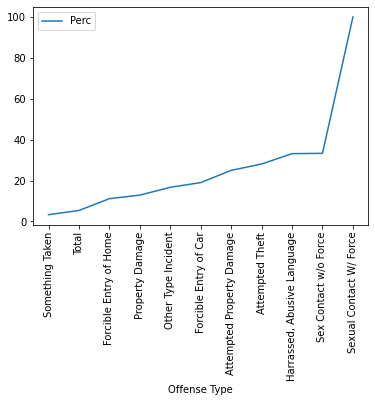

In [660]:
df_crime.plot(x='Offense Type', y='Perc', rot=90)
plt.xticks(df_crime.index, df_crime['Offense Type']);

### Means of Attack by Offender

In [135]:
# At least one good entry in one or more of the answer category codes 1-7
df_incident[df_incident['V4050']==1]['V4050'].count()

12362

In [163]:
ls_weapon_offender = ['Hand Gun', 'Other Gun', 'Knife', 'Sharp Object', 'Blunt Object', 'Other', 'Gun Type Unknown', 'Total']
ls_weapon_offender

['Hand Gun',
 'Other Gun',
 'Knife',
 'Sharp Object',
 'Blunt Object',
 'Other',
 'Gun Type Unknown',
 'Total']

In [145]:
ls_weapon_offender_var = []
for i in range(4051,4058):
    ls_weapon_offender_var.append('V'+str(i))
ls_weapon_offender_var

['V4051', 'V4052', 'V4053', 'V4054', 'V4055', 'V4056', 'V4057']

In [164]:
ls_oweapon_n = []
ls_oweapon_perc = []
count_total_weapon_across_categories = 0
count_total_across_categories = 0
for weapon_offender_var in ls_weapon_offender_var:
    count_weapon = df_incident[df_incident[weapon_offender_var]==1][weapon_offender_var].count()
    count_total_weapon_across_categories += count_weapon
    count_total = df_incident[df_incident[weapon_offender_var]<2][weapon_offender_var].count()
    count_total_across_categories += count_total
    ls_oweapon_n.append(count_weapon)
    ls_oweapon_perc.append(count_weapon/count_total)
ls_oweapon_n.append(count_total_weapon_across_categories)
ls_oweapon_perc.append(count_total_weapon_across_categories/count_total_across_categories)
print(ls_oweapon_n)
print(ls_oweapon_perc)

[4051, 639, 3025, 610, 2396, 2404, 64, 13189]
[0.3084596055737455, 0.048656057260336553, 0.23033579532475443, 0.04644787938780172, 0.18244117871011956, 0.18305033122668088, 0.004873220132490672, 0.1434662953737042]


In [165]:
ls_oweapon_n_2004 = []
ls_oweapon_perc_2004 = []
count_total_weapon_across_categories_2004 = 0
count_total_across_categories_2004 = 0
for weapon_offender_var in ls_weapon_offender_var:
    count_weapon = df_incident[(df_incident[weapon_offender_var]==1) & (df_incident['Year']<=2004)][weapon_offender_var].count()
    count_total_weapon_across_categories_2004 += count_weapon
    count_total = df_incident[(df_incident[weapon_offender_var]<2) & (df_incident['Year']<=2004)][weapon_offender_var].count()
    count_total_across_categories_2004 += count_total
    ls_oweapon_n_2004.append(count_weapon)
    ls_oweapon_perc_2004.append(count_weapon/count_total)
ls_oweapon_n_2004.append(count_total_weapon_across_categories_2004)
ls_oweapon_perc_2004.append(count_total_weapon_across_categories_2004/count_total_across_categories_2004)
print(ls_oweapon_n_2004)
print(ls_oweapon_perc_2004)

[2826, 447, 2083, 401, 1603, 1883, 43, 9286]
[0.3089199825098382, 0.048863139484040224, 0.22770004372540445, 0.04383471797114123, 0.17522955837341495, 0.20583734149540883, 0.00470048097944906, 0.14501218064838528]


In [166]:
ls_oweapon_n_2016 = []
ls_oweapon_perc_2016 = []
count_total_weapon_across_categories_2016 = 0
count_total_across_categories_2016 = 0
for weapon_offender_var in ls_weapon_offender_var:
    count_weapon = df_incident[(df_incident[weapon_offender_var]==1) & (df_incident['Year']>=2005)][weapon_offender_var].count()
    count_total_weapon_across_categories_2016 += count_weapon
    count_total = df_incident[(df_incident[weapon_offender_var]<2) & (df_incident['Year']>=2005)][weapon_offender_var].count()
    count_total_across_categories_2016 += count_total
    ls_oweapon_n_2016.append(count_weapon)
    ls_oweapon_perc_2016.append(count_weapon/count_total)
ls_oweapon_n_2016.append(count_total_weapon_across_categories_2016)
ls_oweapon_perc_2016.append(count_total_weapon_across_categories_2016/count_total_across_categories_2016)
print(ls_oweapon_n_2016)
print(ls_oweapon_perc_2016)

[1225, 192, 942, 209, 793, 521, 21, 3903]
[0.3074027603513174, 0.04818067754077792, 0.23638644918444165, 0.05244667503136763, 0.19899623588456714, 0.13074027603513175, 0.005269761606022585, 0.13991754794766087]


In [170]:
ls_stats = []
ls_p = []
ay_before_total = []
ay_after_total = []
for oweapon_var in ls_weapon_offender_var:
    ay_before = df_incident[(df_incident[oweapon_var]<2) & (df_incident['Year']<=2004)][oweapon_var].values
    ay_before_total = np.concatenate((ay_before_total, ay_before))
    ay_after = df_incident[(df_incident[oweapon_var]<2) & (df_incident['Year']>=2005)][oweapon_var].values
    ay_after_total = np.concatenate((ay_after_total, ay_after))
    results = stats.ttest_ind(ay_before, ay_after, equal_var = False)
    ls_stats.append(results.statistic)
    ls_p.append(results.pvalue)
results = stats.ttest_ind(ay_before_total, ay_after_total, equal_var = False)
ls_stats.append(results.statistic)
ls_p.append(results.pvalue)
print(ls_stats)
print(ls_p)

[0.17315098192144737, 0.1675449436431349, -1.081304134874029, -2.085269460905891, -3.181374764026895, 11.02496521861703, -0.4211434786706824, 2.037788265707375]
[0.8625373676152136, 0.8669457276834425, 0.27959664054842964, 0.037080806477242094, 0.0014719521177465052, 4.3789924033019915e-28, 0.6736628696316961, 0.04157599158160344]


In [171]:
d = {'Offender Weapon Type': ls_weapon_offender, 'Weapon Count': ls_oweapon_n, 'Weapon Perc': ls_oweapon_perc, 
     'Weapon Count (1992-2004)': ls_oweapon_n_2004, 'Weapon Perc (1992-2004)': ls_oweapon_perc_2004, 
     'Weapon Count (2005-2016)': ls_oweapon_n_2016, 'Weapon Perc (2005-2016)': ls_oweapon_perc_2016,
     'T Stat': ls_stats, 'P Value': ls_p}
df_oweapon = pd.DataFrame(d)
df_oweapon = df_oweapon.round(2)
df_oweapon

,Offender Weapon Type,Weapon Count,Weapon Perc,Weapon Count (1992-2004),Weapon Perc (1992-2004),Weapon Count (2005-2016),Weapon Perc (2005-2016),T Stat,P Value
0,Hand Gun,4051,0.31,2826,0.31,1225,0.31,0.17,0.86
1,Other Gun,639,0.05,447,0.05,192,0.05,0.17,0.87
2,Knife,3025,0.23,2083,0.23,942,0.24,-1.08,0.28
3,Sharp Object,610,0.05,401,0.04,209,0.05,-2.09,0.04
4,Blunt Object,2396,0.18,1603,0.18,793,0.20,-3.18,0.00
5,Other,2404,0.18,1883,0.21,521,0.13,11.02,0.00
6,Gun Type Unknown,64,0.00,43,0.00,21,0.01,-0.42,0.67
7,Total,13189,0.14,9286,0.15,3903,0.14,2.04,0.04


In [172]:
print(df_oweapon.to_latex(index=False, caption='Offender Weapon Use before and after SYG Law', label='tbl:oweapon'))

\begin{table}
\centering
\caption{Offender Weapon Use before and after SYG Law}
\label{tbl:oweapon}
\begin{tabular}{lrrrrrrrr}
\toprule
Offender Weapon Type &  Weapon Count &  Weapon Perc &  Weapon Count (1992-2004) &  Weapon Perc (1992-2004) &  Weapon Count (2005-2016) &  Weapon Perc (2005-2016) &  T Stat &  P Value \\
\midrule
            Hand Gun &          4051 &         0.31 &                      2826 &                     0.31 &                      1225 &                     0.31 &    0.17 &     0.86 \\
           Other Gun &           639 &         0.05 &                       447 &                     0.05 &                       192 &                     0.05 &    0.17 &     0.87 \\
               Knife &          3025 &         0.23 &                      2083 &                     0.23 &                       942 &                     0.24 &   -1.08 &     0.28 \\
        Sharp Object &           610 &         0.05 &                       401 &                     0.04 &   

#### Weapon Use

In [606]:
ls_weapon_name = ['Raped', 'Tried to Rape', 'Sexual Assault', 'Shot', 'Shot at, Missed', 'Hit w/ Gun Held in Hand', 'Stabbed, Cut w/ Knife', 
                  'Attacked w/ Knife', 'Hit by Object Held in Hand', 'Hit by Thrown Object', 'Attacked w/ Other Weapon',
                  'Hit, Slapped, Knocked Down', 'Grabbed, Held, Tripped, etc.', 'Other Type of Attack']
ls_weapon_name

['Raped',
 'Tried to Rape',
 'Sexual Assault',
 'Shot',
 'Shot at, Missed',
 'Hit w/ Gun Held in Hand',
 'Stabbed, Cut w/ Knife',
 'Attacked w/ Knife',
 'Hit by Object Held in Hand',
 'Hit by Thrown Object',
 'Attacked w/ Other Weapon',
 'Hit, Slapped, Knocked Down',
 'Grabbed, Held, Tripped, etc.',
 'Other Type of Attack']

In [603]:
ls_weapon = make_varlist(4094, 4108)
ls_weapon

['V4094',
 'V4095',
 'V4096',
 'V4097',
 'V4098',
 'V4099',
 'V4100',
 'V4101',
 'V4102',
 'V4103',
 'V4104',
 'V4105',
 'V4106',
 'V4107']

In [604]:
tp_weapon = sum_stats(ls_weapon, df_incident)
tp_weapon

([833,
  416,
  490,
  117,
  39,
  238,
  471,
  275,
  1517,
  987,
  244,
  13716,
  10122,
  2286,
  31751],
 ['3.49%',
  '1.74%',
  '2.05%',
  '0.49%',
  '0.16%',
  '1.0%',
  '1.97%',
  '1.15%',
  '6.36%',
  '4.14%',
  '1.02%',
  '57.51%',
  '42.44%',
  '9.58%',
  '9.51%'],
 [548,
  282,
  285,
  84,
  28,
  148,
  309,
  189,
  1038,
  683,
  173,
  9270,
  7060,
  1865,
  21962],
 ['3.4%',
  '1.75%',
  '1.77%',
  '0.52%',
  '0.17%',
  '0.92%',
  '1.92%',
  '1.17%',
  '6.44%',
  '4.24%',
  '1.07%',
  '57.51%',
  '43.8%',
  '11.57%',
  '9.73%'],
 [285, 134, 205, 33, 11, 90, 162, 86, 479, 304, 71, 4446, 3062, 421, 9789],
 ['3.69%',
  '1.73%',
  '2.65%',
  '0.43%',
  '0.14%',
  '1.16%',
  '2.1%',
  '1.11%',
  '6.2%',
  '3.93%',
  '0.92%',
  '57.52%',
  '39.61%',
  '5.45%',
  '9.05%'])

In [605]:
tp_weapon_test = t_test(ls_weapon, df_incident)
tp_weapon_test

3
3
3
3
3
3
3
3
3
3
3
3
3
3


([-1.12,
  0.09,
  -4.21,
  1.01,
  0.58,
  -1.72,
  -0.91,
  0.41,
  0.72,
  1.12,
  1.14,
  -0.01,
  6.16,
  16.98,
  6.4],
 [0.26,
  0.93,
  0.0,
  0.31,
  0.56,
  0.09,
  0.36,
  0.68,
  0.47,
  0.26,
  0.25,
  0.99,
  0.0,
  0.0,
  0.0])

In [607]:
df_weapon = make_table(ls_weapon_name, 'Weapon Use', tp_weapon, tp_weapon_test)
df_weapon

,Weapon Use,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,Raped,833,3.49%,548,3.4%,285,3.69%,-1.12,0.26
1,Tried to Rape,416,1.74%,282,1.75%,134,1.73%,0.09,0.93
2,Sexual Assault,490,2.05%,285,1.77%,205,2.65%,-4.21,0.00
3,Shot,117,0.49%,84,0.52%,33,0.43%,1.01,0.31
4,"Shot at, Missed",39,0.16%,28,0.17%,11,0.14%,0.58,0.56
5,Hit w/ Gun Held in Hand,238,1.0%,148,0.92%,90,1.16%,-1.72,0.09
6,"Stabbed, Cut w/ Knife",471,1.97%,309,1.92%,162,2.1%,-0.91,0.36
7,Attacked w/ Knife,275,1.15%,189,1.17%,86,1.11%,0.41,0.68
8,Hit by Object Held in Hand,1517,6.36%,1038,6.44%,479,6.2%,0.72,0.47
9,Hit by Thrown Object,987,4.14%,683,4.24%,304,3.93%,1.12,0.26


In [608]:
print_latex(df_weapon, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr', 
            caption='Weapon Use before and after the SYG Law',
            label='tbl:weapon')

\begin{table}[H]
\centering
\caption{Weapon Use before and after the SYG Law}
\label{tbl:weapon}
\begin{tabular}{lrl p{10mm} p{10mm} p{10mm} p{10mm} rr}
\toprule
                  Weapon Use &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
                       Raped &    833 &  3.49\% &                548 &             3.4\% &                285 &            3.69\% &   -1.12 &     0.26 \\
               Tried to Rape &    416 &  1.74\% &                282 &            1.75\% &                134 &            1.73\% &    0.09 &     0.93 \\
              Sexual Assault &    490 &  2.05\% &                285 &            1.77\% &                205 &            2.65\% &   -4.21 &     0.00 \\
                        Shot &    117 &  0.49\% &                 84 &            0.52\% &                 33 &            0.43\% &    1.01 &     0.31 \\
             Shot at, Missed &     39 &  0.16\% &             

### Means of Defense by Victim

#### All

In [314]:
ls_v = ['Attacked w/ Gun', 'Attacked w/ Other Weapon', 'Attacked w/o Weapon', 'Threatened w/ Gun', 'Threatened w/ Other Weapon', 'Threatened w/o Weapon',
        'Defended Self or Property', 'Chased Offender', 'Yelled, Turned on Lights', 'Cooperated', 'Argued, Reasoned', 'Ran Away, Hid, Locked Door',
        'Called Police', 'Tried to get Attention', 'Screamed from Pain, Fear', 'Other']
ls_v

In [340]:
tp_sum_stats = sum_stats(ls_var, df_incident)
tp_sum_stats

([152,
  442,
  4611,
  469,
  446,
  1013,
  10251,
  1777,
  6943,
  1168,
  5795,
  7684,
  5889,
  1469,
  1337,
  7997,
  57443],
 ['0.36%',
  '1.06%',
  '11.04%',
  '1.12%',
  '1.07%',
  '2.42%',
  '24.53%',
  '4.25%',
  '16.62%',
  '2.8%',
  '13.87%',
  '18.39%',
  '14.09%',
  '3.52%',
  '3.2%',
  '19.14%',
  '8.59%'],
 [79,
  314,
  3479,
  271,
  299,
  741,
  7084,
  1107,
  4304,
  801,
  3802,
  5350,
  3484,
  905,
  829,
  6406,
  39255],
 ['0.27%',
  '1.08%',
  '11.95%',
  '0.93%',
  '1.03%',
  '2.54%',
  '24.33%',
  '3.8%',
  '14.78%',
  '2.75%',
  '13.06%',
  '18.37%',
  '11.97%',
  '3.11%',
  '2.85%',
  '22.0%',
  '8.43%'],
 [73,
  128,
  1132,
  198,
  147,
  272,
  3167,
  670,
  2639,
  367,
  1993,
  2334,
  2405,
  564,
  508,
  1591,
  18188],
 ['0.58%',
  '1.01%',
  '8.94%',
  '1.56%',
  '1.16%',
  '2.15%',
  '25.0%',
  '5.29%',
  '20.83%',
  '2.9%',
  '15.73%',
  '18.43%',
  '18.99%',
  '4.45%',
  '4.01%',
  '12.56%',
  '8.97%'])

In [343]:
ls_t_test = t_test(ls_var, df_incident)
ls_t_test

([-4.13,
  0.63,
  9.51,
  -5.11,
  -1.19,
  2.51,
  -1.46,
  -6.52,
  -14.53,
  -0.83,
  -7.06,
  -0.13,
  -17.68,
  -6.41,
  -5.82,
  24.74,
  -7.27],
 [0.0,
  0.53,
  0.0,
  0.0,
  0.23,
  0.01,
  0.14,
  0.0,
  0.0,
  0.41,
  0.0,
  0.9,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [346]:
df_v = make_table(ls_v, tp_sum_stats, ls_t_test)

In [347]:
print(df_v.to_latex(index=False, caption='Victim Self-Defense before and after SYG Law', label='tbl:v'))

\begin{table}
\centering
\caption{Victim Self-Defense before and after SYG Law}
\label{tbl:v}
\begin{tabular}{lrlrlrlrr}
\toprule
            Victim Defense &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
           Attacked w/ Gun &    152 &  0.36\% &                 79 &            0.27\% &                 73 &            0.58\% &   -4.13 &     0.00 \\
  Attacked w/ Other Weapon &    442 &  1.06\% &                314 &            1.08\% &                128 &            1.01\% &    0.63 &     0.53 \\
       Attacked w/o Weapon &   4611 & 11.04\% &               3479 &           11.95\% &               1132 &            8.94\% &    9.51 &     0.00 \\
         Threatened w/ Gun &    469 &  1.12\% &                271 &            0.93\% &                198 &            1.56\% &   -5.11 &     0.00 \\
Threatened w/ Other Weapon &    446 &  1.07\% &                299 &            1.03\% &                

#### Defended on Their Own

In [10]:
ls_v_def = ['Attacked w/ Gun', 'Attacked w/ Other Weapon', 'Attacked w/o Weapon', 'Threatened w/ Gun', 'Threatened w/ Other Weapon', 'Threatened w/o Weapon',
            'Defended Self or Property', 'Chased Offender', 'Yelled, Turned on Lights', 'Argued, Reasoned']
ls_v_def

['Attacked w/ Gun',
 'Attacked w/ Other Weapon',
 'Attacked w/o Weapon',
 'Threatened w/ Gun',
 'Threatened w/ Other Weapon',
 'Threatened w/o Weapon',
 'Defended Self or Property',
 'Chased Offender',
 'Yelled, Turned on Lights',
 'Argued, Reasoned']

In [11]:
ls_var_def = make_varlist(4144, 4153)
ls_var_def

['V4144',
 'V4145',
 'V4146',
 'V4147',
 'V4148',
 'V4149',
 'V4150',
 'V4151',
 'V4152']

In [12]:
ls_var_def.append('V4154')
ls_var_def

['V4144',
 'V4145',
 'V4146',
 'V4147',
 'V4148',
 'V4149',
 'V4150',
 'V4151',
 'V4152',
 'V4154']

In [13]:
tp_sum_stats_def = sum_stats(ls_var_def, df_incident)
tp_sum_stats_def

([152, 442, 4611, 469, 446, 1013, 10251, 1777, 6943, 5795, 31899],
 ['0.36%',
  '1.06%',
  '11.04%',
  '1.12%',
  '1.07%',
  '2.42%',
  '24.53%',
  '4.25%',
  '16.62%',
  '13.87%',
  '7.63%'],
 [79, 314, 3479, 271, 299, 741, 7084, 1107, 4304, 3802, 21480],
 ['0.27%',
  '1.08%',
  '11.95%',
  '0.93%',
  '1.03%',
  '2.54%',
  '24.33%',
  '3.8%',
  '14.78%',
  '13.06%',
  '7.38%'],
 [73, 128, 1132, 198, 147, 272, 3167, 670, 2639, 1993, 10419],
 ['0.58%',
  '1.01%',
  '8.94%',
  '1.56%',
  '1.16%',
  '2.15%',
  '25.0%',
  '5.29%',
  '20.83%',
  '15.73%',
  '8.23%'])

In [14]:
ls_t_test_def = t_test(ls_var_def, df_incident)
ls_t_test_def

NameError: name 't_test' is not defined

In [442]:
df_v_def = make_table(ls_v_def, 'Method of Defense', tp_sum_stats_def, ls_t_test_def)
df_v_def

In [445]:
print_latex(df_v_def, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr', caption='Victim Self-Defense: Took Defense Action on Their Own', label='tbl:v_def')

\begin{table}[H]
\centering
\caption{Victim Self-Defense: Took Defense Action on Their Own}
\label{tbl:v_def}
\begin{tabular}{lrl p{10mm} p{10mm} p{10mm} p{10mm} rr}
\toprule
         Method of Defense &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
           Attacked w/ Gun &    152 &  0.36\% &                 79 &            0.27\% &                 73 &            0.58\% &   -4.13 &     0.00 \\
  Attacked w/ Other Weapon &    442 &  1.06\% &                314 &            1.08\% &                128 &            1.01\% &    0.63 &     0.53 \\
       Attacked w/o Weapon &   4611 & 11.04\% &               3479 &           11.95\% &               1132 &            8.94\% &    9.51 &     0.00 \\
         Threatened w/ Gun &    469 &  1.12\% &                271 &            0.93\% &                198 &            1.56\% &   -5.11 &     0.00 \\
Threatened w/ Other Weapon &    446 &  1.07\% &            

In [512]:
df_incident.groupby(['Year', 'V4144', 'V2127B'])['V4144'] \
    .count().to_frame().rename(columns={'V4144':'Count'}) \
    .reset_index().pivot(index=['Year', 'V2127B'], columns=['V4144'], values='Count') \
    .rename_axis(None, axis=1).reset_index()

,Year,V2127B,0,1,9
0,1992,-1,2008.0,7.0,8791.0
1,1993,-1,2891.0,14.0,12395.0
2,1994,-1,3849.0,5.0,15927.0
3,1995,-1,3082.0,9.0,13641.0
4,1995,1,61.0,NaN,221.0
...,...,...,...,...,...
87,2015,4,284.0,1.0,1780.0
88,2016,1,140.0,1.0,913.0
89,2016,2,412.0,1.0,2302.0
90,2016,3,394.0,4.0,2719.0


In [15]:
def analyze_by_cat(ls_var, *args, **kwargs):
    index2 = kwargs.get('index2', None)
    
    if index2:
        for var in ls_var:
            if var==ls_var[0]:
                df_temp = df_incident.groupby(['Year', index2, var])[var] \
                    .count().to_frame().rename(columns={var: 'Count'}) \
                    .reset_index().pivot(index=['Year', index2], columns=var, values='Count').reset_index() \
                    .rename_axis(None, axis=1)
            else:
                df_temp2 = df_incident.groupby(['Year', index2, var])[var] \
                    .count().to_frame().rename(columns={var: 'Count'}) \
                    .reset_index().pivot(index=['Year', index2], columns=var, values='Count').reset_index() \
                    .rename_axis(None, axis=1)
                df_temp = df_temp.set_index(['Year', index2]).add(df_temp2.set_index(['Year', index2]), fill_value=0).reset_index()
    else:
        for var in ls_var:
            if var==ls_var[0]:
                df_temp = df_incident.groupby(['Year', var])[var] \
                    .count().to_frame().rename(columns={var: 'Count'}) \
                    .reset_index().pivot(index=['Year'], columns=var, values='Count').reset_index() \
                    .rename_axis(None, axis=1)
            else:
                df_temp2 = df_incident.groupby(['Year', var])[var] \
                    .count().to_frame().rename(columns={var: 'Count'}) \
                    .reset_index().pivot(index=['Year'], columns=var, values='Count').reset_index() \
                    .rename_axis(None, axis=1)
                df_temp = df_temp.set_index(['Year']).add(df_temp2.set_index(['Year']), fill_value=0).reset_index()
                
    df_temp['Perc'] = df_temp[1]/(df_temp[1]+df_temp[0])
    
    return(df_temp)

In [23]:
def plot_self_defense(df, fig_name, *args, **kwargs):
    ls_markers = kwargs.get('ls_markers', None)
    ls_regions = kwargs.get('ls_regions', None)
    
    if ls_markers and ls_regions:
        j = 0
        for i in df['V2127B'].unique():
            plt.plot(df[df['V2127B']==i]['Year'], 
                     df[df['V2127B']==i]['Perc'], label='${j}$'.format(j=ls_region[j]),
                     marker=ls_marker[j])
            j += 1
        plt.legend(loc='best')
    else:
        plt.plot(df['Year'], 
                 df['Perc'])
    plt.ylim(0, .1)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel('Year')
    plt.ylabel('Perc Self-Defense')
    plt.savefig(fig_name, bbox_inches = 'tight', dpi=100)
    plt.show();

In [16]:
df_defense_total = analyze_by_cat(ls_var_def)
df_defense_total

,Year,0,1,9,Perc
0,1992,18675,1475,87910,0.073201
1,1993,26846,2204,123950,0.075869
2,1994,35710,2830,159270,0.073430
3,1995,31305,2465,148400,0.072994
4,1996,26870,2120,131240,0.073129
5,1997,24125,1875,115580,0.072115
6,1998,20832,1648,104140,0.073310
7,1999,18825,1465,91850,0.072203
8,2000,15544,1166,84390,0.069779
9,2001,14429,1181,79140,0.075657


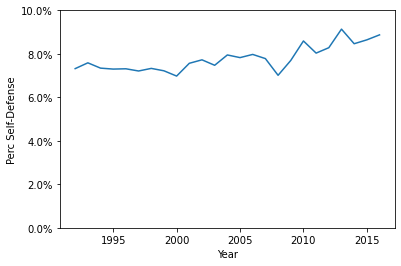

In [24]:
plot_self_defense(df_defense_total, 'defense_total.png')

In [559]:
df_defense = analyze_by_cat(ls_var_def, index2='V2127B')
df_defense

,Year,V2127B,0,1,9,Perc
0,1992,-1,18675.0,1475.0,87910.0,0.073201
1,1993,-1,26846.0,2204.0,123950.0,0.075869
2,1994,-1,35710.0,2830.0,159270.0,0.073430
3,1995,-1,28626.0,2284.0,136410.0,0.073892
4,1995,1,575.0,35.0,2210.0,0.057377
...,...,...,...,...,...,...
87,2015,4,2620.0,230.0,17800.0,0.080702
88,2016,1,1290.0,120.0,9130.0,0.085106
89,2016,2,3785.0,345.0,23020.0,0.083535
90,2016,3,3602.0,378.0,27190.0,0.094975


In [557]:
df_defense = df_defense.style.format({0: '{:,.0f}', 1: '{:,.0f}', 9: '{:,.0f}', 'Perc': '{:.2%}'})
df_defense

In [538]:
df_defense['V2127B'].unique().tolist()

[-1, 1, 2, 3, 4]

#### Sought Help from Others

In [240]:
ls_v_seek_help = ['Argued, Reasoned', 'Ran Away, Hid, Locked Door',
                  'Called Police', 'Tried to get Attention', 'Screamed from Pain, Fear', 'Other']
ls_v_seek_help

['Argued, Reasoned',
 'Ran Away, Hid, Locked Door',
 'Called Police',
 'Tried to get Attention',
 'Screamed from Pain, Fear',
 'Other']

In [241]:
ls_var_seek_help = make_varlist(4154, 4160)
ls_var_seek_help

['V4154', 'V4155', 'V4156', 'V4157', 'V4158', 'V4159']

In [257]:
tp_sum_stats_seek_help = sum_stats(ls_var_seek_help, df_incident)
tp_sum_stats_seek_help

([5795, 7684, 5889, 1469, 1337, 7997],
 ['13.87%', '18.39%', '14.09%', '3.52%', '3.2%', '19.14%'],
 [3802, 5350, 3484, 905, 829, 6406],
 ['13.06%', '18.37%', '11.97%', '3.11%', '2.85%', '22.0%'],
 [1993, 2334, 2405, 564, 508, 1591],
 ['15.73%', '18.43%', '18.99%', '4.45%', '4.01%', '12.56%'])

In [247]:
ls_t_test_seek_help = t_test(ls_var_seek_help, df_incident)
ls_t_test_seek_help

([-7.06, -0.13, -17.68, -6.41, -5.82, 24.74], [0.0, 0.9, 0.0, 0.0, 0.0, 0.0])

In [261]:
make_table(ls_v_seek_help, tp_sum_stats_seek_help, ls_t_test_seek_help)

,Victim Defense,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,"Argued, Reasoned",5795,13.87%,3802,13.06%,1993,15.73%,-7.06,0.0
1,"Ran Away, Hid, Locked Door",7684,18.39%,5350,18.37%,2334,18.43%,-0.13,0.9
2,Called Police,5889,14.09%,3484,11.97%,2405,18.99%,-17.68,0.0
3,Tried to get Attention,1469,3.52%,905,3.11%,564,4.45%,-6.41,0.0
4,"Screamed from Pain, Fear",1337,3.2%,829,2.85%,508,4.01%,-5.82,0.0
5,Other,7997,19.14%,6406,22.0%,1591,12.56%,24.74,0.0


### Types of Injuries Suffered

In [348]:
ls_i = ['Rape Injuries', 'Attempted Rape Injuries', 'Sexual Assault Injuries', 'Knife, Stab Wounds', 'Gun Shot, Bullet Wounds',
        'Broken Bones or Teeth', 'Internal Injuries', 'Knocked Unconscious', 'Bruises, Cuts', 'Other Injuries']
ls_i

['Rape Injuries',
 'Attempted Rape Injuries',
 'Sexual Assault Injuries',
 'Knife, Stab Wounds',
 'Gun Shot, Bullet Wounds',
 'Broken Bones or Teeth',
 'Internal Injuries',
 'Knocked Unconscious',
 'Bruises, Cuts',
 'Other Injuries']

In [349]:
ls_i_vars = make_varlist(4112, 4122)
ls_i_vars

['V4112',
 'V4113',
 'V4114',
 'V4115',
 'V4116',
 'V4117',
 'V4118',
 'V4119',
 'V4120',
 'V4121']

In [350]:
tp_i_sum_stats = sum_stats(ls_i_vars, df_incident)
tp_i_sum_stats

([835, 145, 128, 373, 100, 766, 318, 493, 11215, 2116, 16489],
 ['3.5%',
  '0.61%',
  '0.54%',
  '1.56%',
  '0.42%',
  '3.21%',
  '1.33%',
  '2.07%',
  '47.03%',
  '8.87%',
  '6.91%'],
 [550, 94, 74, 239, 69, 483, 163, 281, 7553, 1670, 11176],
 ['3.41%',
  '0.58%',
  '0.46%',
  '1.48%',
  '0.43%',
  '3.0%',
  '1.01%',
  '1.74%',
  '46.86%',
  '10.36%',
  '6.93%'],
 [285, 51, 54, 134, 31, 283, 155, 212, 3662, 446, 5313],
 ['3.69%',
  '0.66%',
  '0.7%',
  '1.73%',
  '0.4%',
  '3.66%',
  '2.01%',
  '2.74%',
  '47.37%',
  '5.77%',
  '6.87%'])

In [352]:
ls_i_t_test = t_test(ls_i_vars, df_incident)
ls_i_t_test

([-1.07, -0.7, -2.2, -1.42, 0.31, -2.63, -5.59, -4.7, -0.75, 12.83, 0.54],
 [0.29, 0.49, 0.03, 0.16, 0.76, 0.01, 0.0, 0.0, 0.45, 0.0, 0.59])

In [353]:
df_i = make_table(ls_i, tp_i_sum_stats, ls_i_t_test)
df_i

,Victim Defense,Count,Perc,Count (1992-2004),Perc (1992-2004),Count (2005-2016),Perc (2005-2016),T Stat,P Value
0,Rape Injuries,835,3.5%,550,3.41%,285,3.69%,-1.07,0.29
1,Attempted Rape Injuries,145,0.61%,94,0.58%,51,0.66%,-0.70,0.49
2,Sexual Assault Injuries,128,0.54%,74,0.46%,54,0.7%,-2.20,0.03
3,"Knife, Stab Wounds",373,1.56%,239,1.48%,134,1.73%,-1.42,0.16
4,"Gun Shot, Bullet Wounds",100,0.42%,69,0.43%,31,0.4%,0.31,0.76
5,Broken Bones or Teeth,766,3.21%,483,3.0%,283,3.66%,-2.63,0.01
6,Internal Injuries,318,1.33%,163,1.01%,155,2.01%,-5.59,0.00
7,Knocked Unconscious,493,2.07%,281,1.74%,212,2.74%,-4.70,0.00
8,"Bruises, Cuts",11215,47.03%,7553,46.86%,3662,47.37%,-0.75,0.45
9,Other Injuries,2116,8.87%,1670,10.36%,446,5.77%,12.83,0.00


In [357]:
print(df_i.to_latex(index=False, column_format='lrl p{10mm} p{10mm} p{10mm} p{10mm} rr', 
                    caption='Victim Injuries before and after SYG Law', label='tbl:i', position='H'))

\begin{table}[H]
\centering
\caption{Victim Injuries before and after SYG Law}
\label{tbl:i}
\begin{tabular}{lrl p{10mm} p{10mm} p{10mm} p{10mm} rr}
\toprule
         Victim Defense &  Count &   Perc &  Count (1992-2004) & Perc (1992-2004) &  Count (2005-2016) & Perc (2005-2016) &  T Stat &  P Value \\
\midrule
          Rape Injuries &    835 &   3.5\% &                550 &            3.41\% &                285 &            3.69\% &   -1.07 &     0.29 \\
Attempted Rape Injuries &    145 &  0.61\% &                 94 &            0.58\% &                 51 &            0.66\% &   -0.70 &     0.49 \\
Sexual Assault Injuries &    128 &  0.54\% &                 74 &            0.46\% &                 54 &             0.7\% &   -2.20 &     0.03 \\
     Knife, Stab Wounds &    373 &  1.56\% &                239 &            1.48\% &                134 &            1.73\% &   -1.42 &     0.16 \\
Gun Shot, Bullet Wounds &    100 &  0.42\% &                 69 &            0.43\% &      

# Results
Show graphs and stats here

## The percent of people who defended themselves

In [2]:
files = ["idea_defense", "defense", "resist", "yell", "argue", "hide", "scare", "escape", "protect", "worse"]

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

(0, 1)

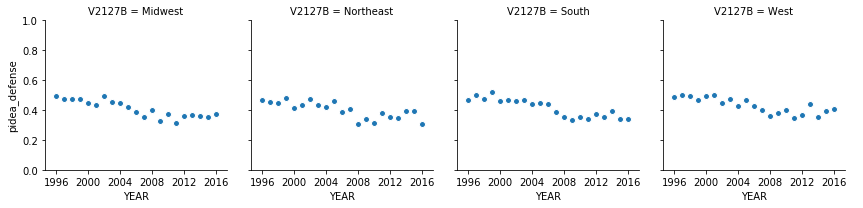

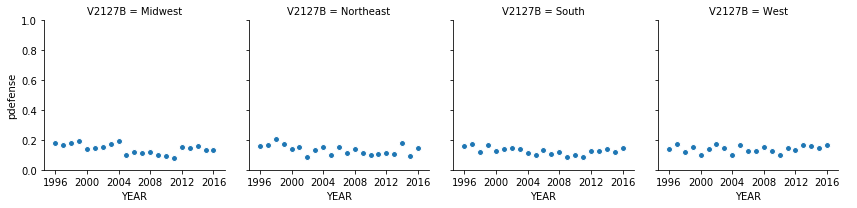

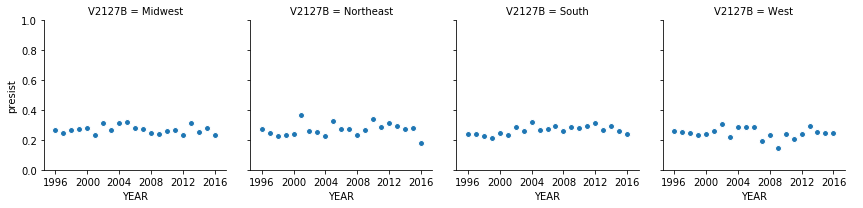

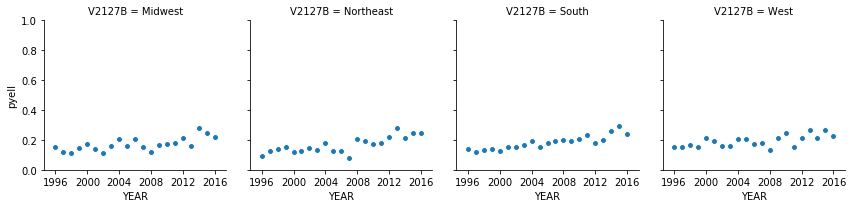

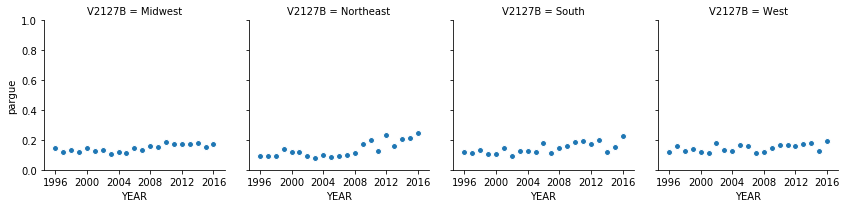

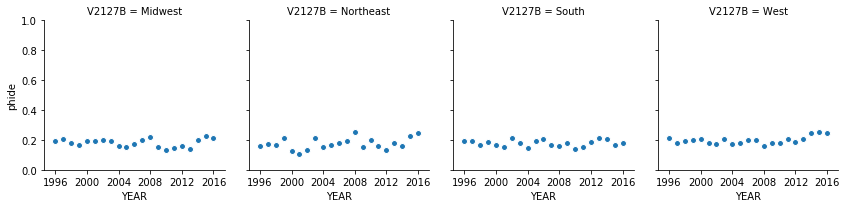

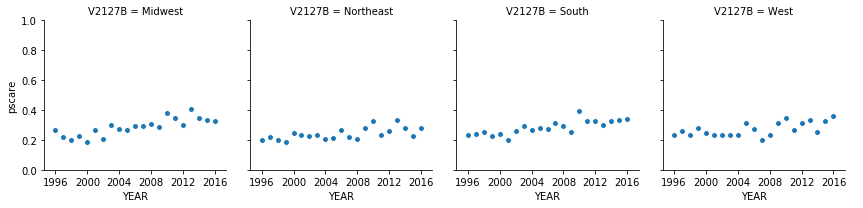

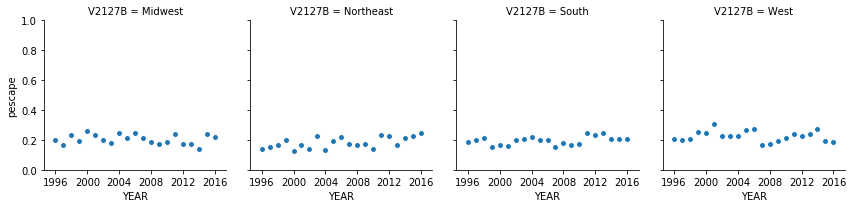

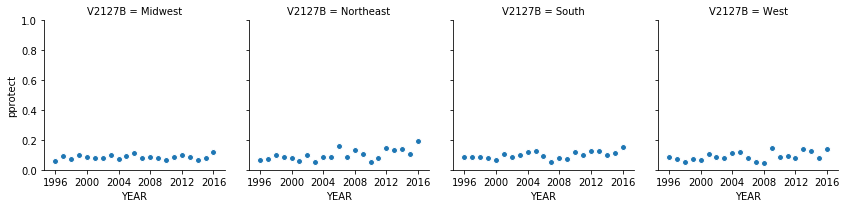

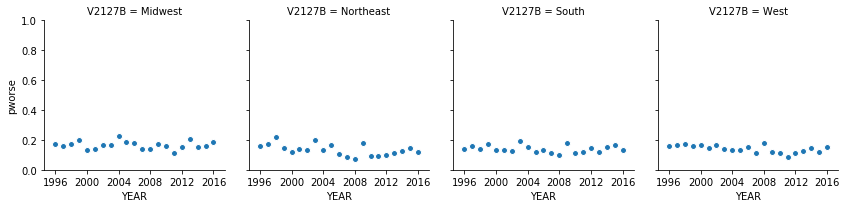

In [16]:
for i in files:
    df = pd.read_stata('%s.dta' % i)
    df['V2127B'] = df['V2127B'].astype(str)
    df = df.sort_values(by=['V2127B'])
    g = sns.FacetGrid(df, col="V2127B")
    g = (g.map(plt.scatter, "YEAR", "p" + i, edgecolor="w").add_legend())
    loc = plticker.MultipleLocator(base=4) # tickers every number of years
    for ax in g.axes.flat:
        ax.set_ylim([0,1]) 
        ax.xaxis.set_major_locator(loc)
        _ = plt.setp(ax.get_xticklabels(), visible=True)
        _ = plt.setp(ax.get_yticklabels(), visible=True)

## The percent of respondents who faced a threat to kill who defended themselves

Text(0, 0.5, 'idea_defense')

(0, 1)

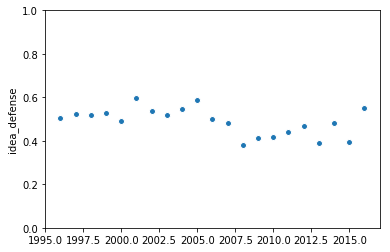

Text(0, 0.5, 'defense')

(0, 1)

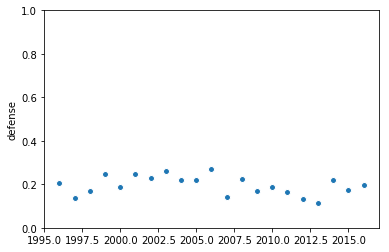

Text(0, 0.5, 'resist')

(0, 1)

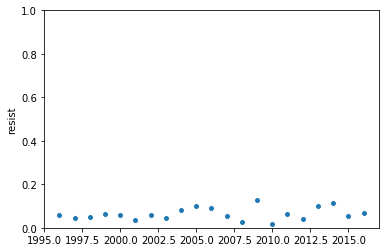

Text(0, 0.5, 'yell')

(0, 1)

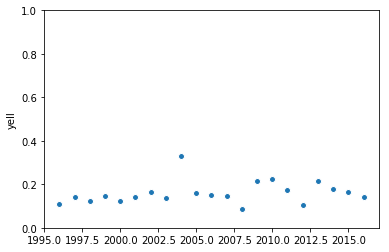

Text(0, 0.5, 'argue')

(0, 1)

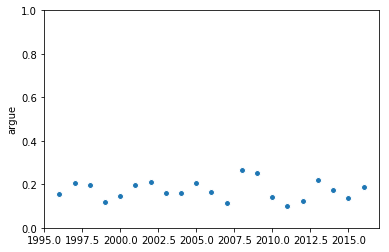

Text(0, 0.5, 'hide')

(0, 1)

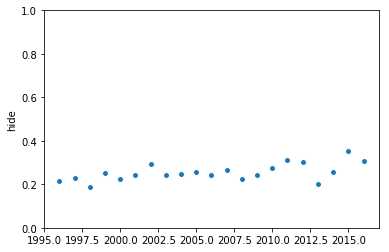

Text(0, 0.5, 'scare')

(0, 1)

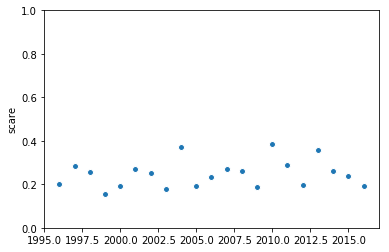

Text(0, 0.5, 'escape')

(0, 1)

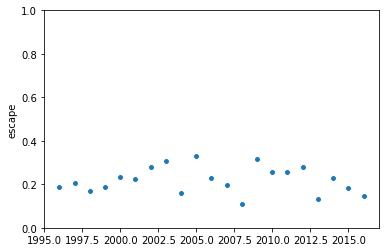

Text(0, 0.5, 'protect')

(0, 1)

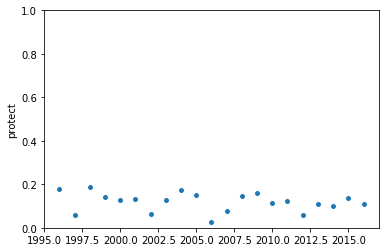

Text(0, 0.5, 'worse')

(0, 1)

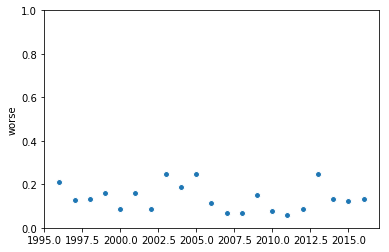

In [67]:
for i in files:
    df = pd.read_stata('%s_a.dta' % i)
    plt.scatter(df["YEAR"], df["p" + i], edgecolor="w")
    plt.ylabel(i)
    plt.ylim(0,1)
    loc = plticker.MultipleLocator(base=4) # tickers every number of years
    plt.show()

## The percent of respondents who didn't face a threat to kill who defended themselves

Text(0, 0.5, 'idea_defense')

(0, 1)

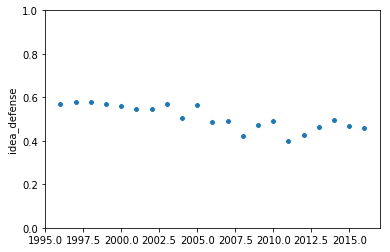

Text(0, 0.5, 'defense')

(0, 1)

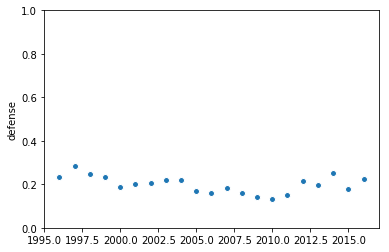

Text(0, 0.5, 'resist')

(0, 1)

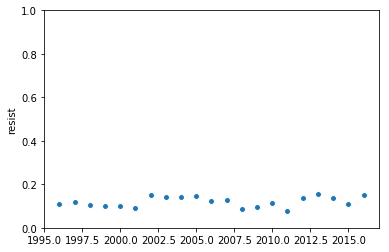

Text(0, 0.5, 'yell')

(0, 1)

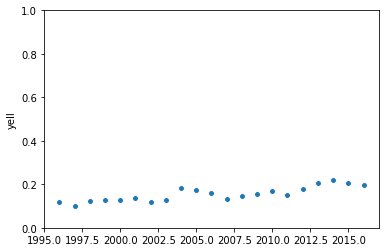

Text(0, 0.5, 'argue')

(0, 1)

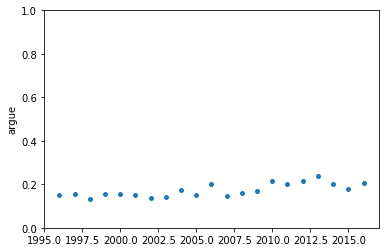

Text(0, 0.5, 'hide')

(0, 1)

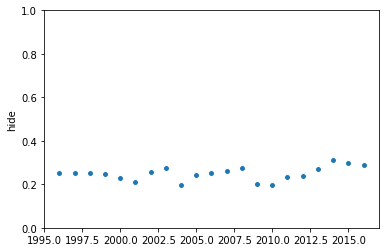

Text(0, 0.5, 'scare')

(0, 1)

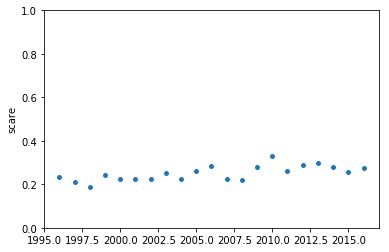

Text(0, 0.5, 'escape')

(0, 1)

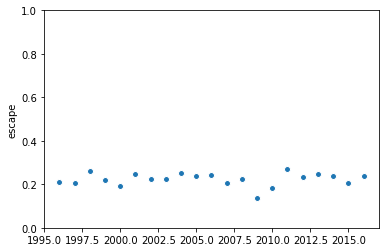

Text(0, 0.5, 'protect')

(0, 1)

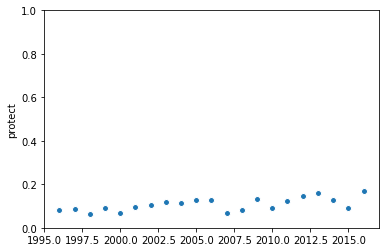

Text(0, 0.5, 'worse')

(0, 1)

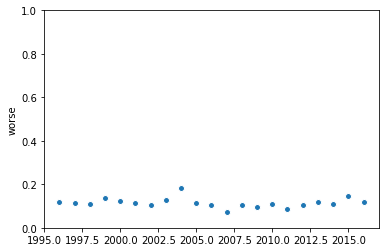

In [68]:
for i in files:
    df = pd.read_stata('%s_b.dta' % i)
    plt.scatter(df["YEAR"], df["p" + i], edgecolor="w")
    plt.ylabel(i)
    plt.ylim(0,1)
    loc = plticker.MultipleLocator(base=4) # tickers every number of years
    plt.show()

# Tables